<a href="https://colab.research.google.com/github/pacomm5/curso-series-temporales/blob/master/3.%20Caracter%C3%ADsticas%20fundamentales/Python/3_Trabajando_con_series_de_tiempo_en_Python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Relevant Packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Loading and Transforming the Data

In [2]:
raw_csv_data = pd.read_csv("https://raw.githubusercontent.com/MaddoSaru/curso-series-temporales/master/3.%20Caracter%C3%ADsticas%20fundamentales/Python/Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True) # convertimos la variable data en fehca
df_comp.set_index("date", inplace=True) # la ponemos como indice.
df_comp=df_comp.asfreq('b') # le decimo que solo nos coja los dias laborales.
df_comp=df_comp.fillna(method='ffill') # aqui le decimos que rellene los valores nan con el posterior. 



### Removing Surplus Data

In [3]:
df_comp['market_value']=df_comp.spx # creamos la variable market value que es igual que el spx

In [4]:
del df_comp['spx'] # borramos todos los indices y nos quedamos con market value. 
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8) # aqui le damos el tamaño al training
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:] # aqui decimo cual va a ser el training y el test

### White Noise

In [5]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))
# ahora vamos geneerar ruido blanco. el metodo se llama random.normal. le tenemos que pasar la media, la desviación estandar, y el tamaño. 
# loc es el el parametro y le decimos que es igual a la media de df.market_value
# scale es otro parametro que es la desviación standar. 
# size es el tamaño. 

In [6]:
df['wn'] = wn # aui creamos la columna wn que será la columna de ruido blanco. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
df.describe() # aqui ya nos aparece la columna de ruido blanco. 
# el count es igual, la media como son numero aleatorios es parecida, y el resto de de datos estadisticos parecido. 

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1092.146173
std,292.559287,292.165331
min,438.920000,-21.961723
25%,914.620000,898.886287
50%,1144.650000,1089.524488
75%,1316.280729,1287.640132
max,1570.252238,2119.596963


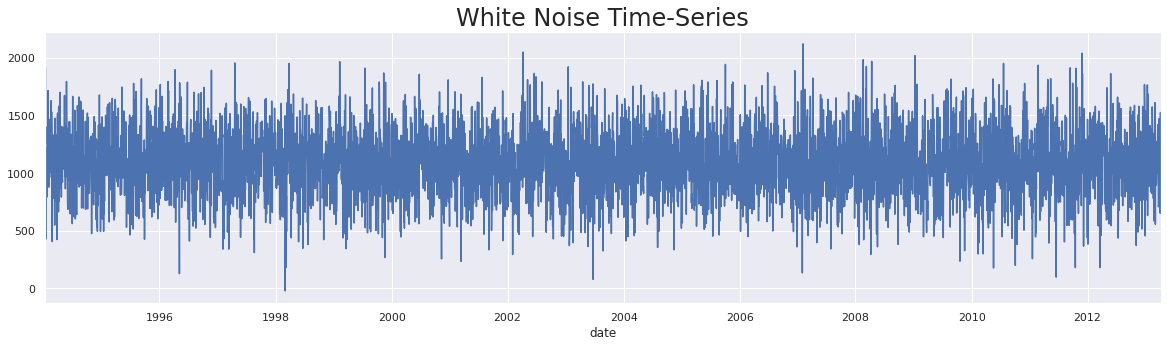

In [8]:
df.wn.plot(figsize = (20,5)) # aui creamos el grafico. 
plt.title("White Noise Time-Series", size= 24) # 
plt.show()
# ya nos pone la fecha porque lo pusimos anteriormente en las fechas. vemos que es un comportamiento aleatorio 

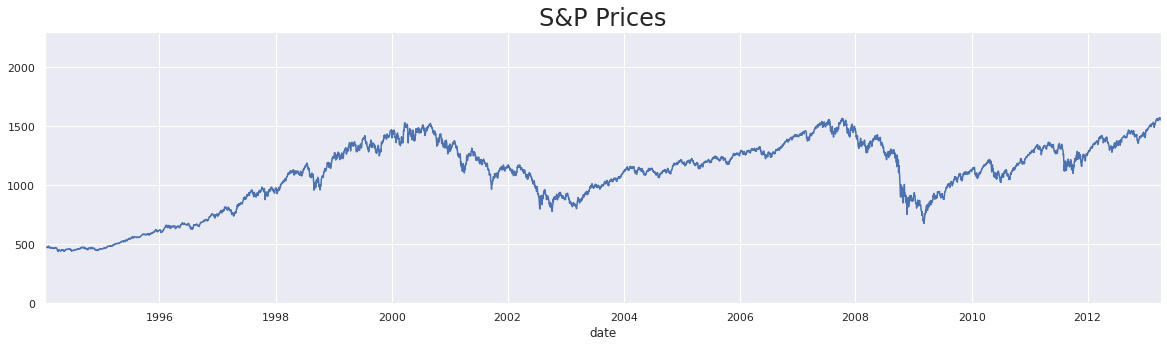

In [9]:
# aqui sacamos el plot de market value. 
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300) # esto se pone para cambiar la escala en el eje y. y sea comparable con la de arriba. 
plt.show()

### Random Walk

In [10]:
rw = pd.read_csv("https://raw.githubusercontent.com/pacomm5/curso-series-temporales/master/3.%20Caracter%C3%ADsticas%20fundamentales/Python/RandWalk.csv")
# el valor del periodo t, sería igual al t-1 mas el ruido blanco. 
# las mejores estiamciones para el precio de mañana, serán los precios de hoy. 


In [11]:
rw.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [12]:
rw.date = pd.to_datetime(rw.date, dayfirst = True)


In [13]:
rw.set_index("date", inplace = True)


In [14]:
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-08,1135.238562
1994-01-09,1109.897831
1994-01-10,1080.347860
1994-01-11,1082.095245


In [15]:
rw = rw.asfreq('b')

In [16]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [17]:
df['rw'] = rw.price

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df.head() # ya hemos incluido rw al df anterior

,market_value,wn,rw
date,,,
1994-01-07,469.90,1230.302525,1122.139662
1994-01-10,475.27,1412.958065,1080.347860
1994-01-11,474.13,772.774655,1082.095245
1994-01-12,474.17,1917.356169,1083.639265
1994-01-13,472.47,903.673501,1067.146255


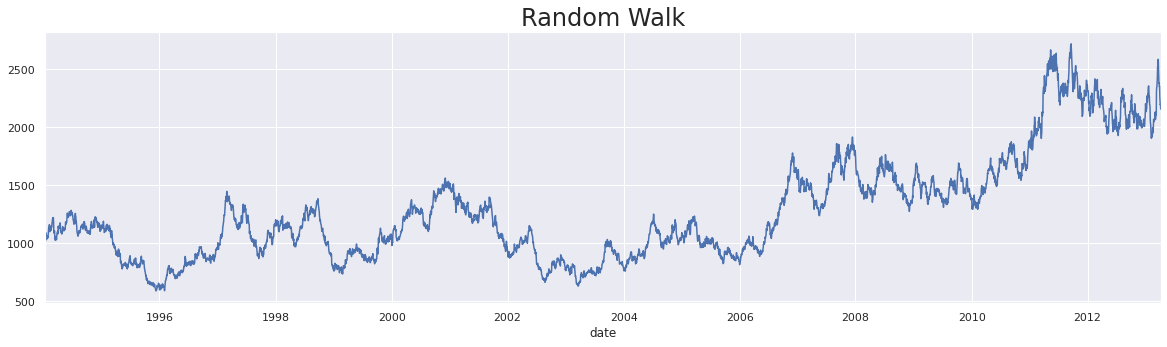

In [19]:
df.rw.plot(figsize = (20,5))
plt.title("Random Walk", size = 24)
plt.show()
# es muy diferente al del ruido blanco. es muy parecido al del sp 500

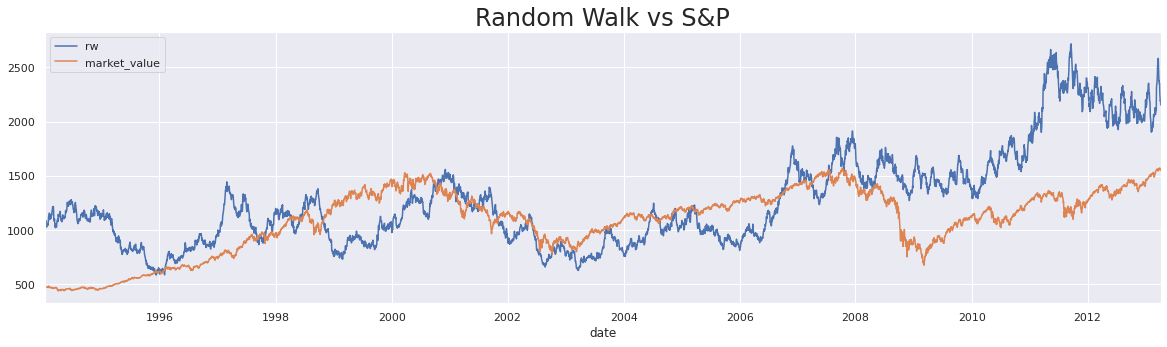

In [20]:
df.rw.plot(figsize = (20,5)) # ponemos los dos juntos
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.legend() 
plt.show()

### Stationarity ojo esto es estacionaridad que no es lo mismo que estacionalidad. 

### la media y la varianza son constantes cuando no hay tendencia. es decir es estacionaria y las covarianzas serán iguales. es decir existe estacionalidad debilmente estacionaria, cuando el ruido blanco es 0. la estacionalidad estricta es cuando tienen distribuciones identicas. esto es ultimo dificil por lo tanto se suele utilizar la estacionaridad debil. 

In [21]:
sts.adfuller(df.market_value)
# aqui lo calculamos para market_value
# -1,73 es el valor de estadistico. este lo tenemos que comparar con el valor crítico. este último estará entre el valor de 1% 10% y 5%
# vamos a tener un valor de nivel crítico dependiendo del nivel de significación que pongamos. 
# primer caso 1% -3 es menor que -1,73 no la rechazamos y por lo tanto no es estacionaria. 
# para el 10% y el 5% para lo mismo nuestro estadístico es mayor y por lo tanto no es estacionaria. 
# aclaración un nivel de significación del 1% significa que tenemos un nivel de confianza del 99%
# ahora lo vamos a hacer por el p-valor, que es 0,41. tambíen es mayor que 0,01 que es el 1% y también es mayor que 0,1 y que 0,05. por lo tanto no rechazamos la hipotesis nula. no es estacionaria. 
# el 18 significa el numero de retrasos que hemos utilizado para calcular el estadístico. este valor tiene que ser 0 para que tengamos estacionalidad. 

# en el caso de debabjo no es estacionario
# el p valor es 0,41 que también es mayor que el 0,05

(-1.736984745235244,
 0.41216456967706194,
 18,
 5002,
 {'1%': -3.431658008603046,
  '10%': -2.567077669247375,
  '5%': -2.862117998412982},
 39904.880607487445)

- la hipotesis nula Ho la serie no es estacionaria. 
- la hipotesis H1 si es estacionaria. es decir no se cumple H0
- contraste de hipotesis. 
    - contrastamos H1 y H0 
    - es decir será H0 hasta que se demuestre lo contrario. 
- dickey Fuller.
    - Ho de un retraso es igual a 1 
    - H1 de un retraso es menor que 1
- los periodos pueden ser horas, dias, años, meses
- en este retraso se calcula un estadístico que se compara con unos valores críticos que vienen en la tabla de dicky fuller. Si es menor se rechaza H0 es decir que es estacionaria. 
- otra forma es ver p-valor, si es menor que 0,05 (normalmente 95 % de confianza. ) se rechaza. 
- 

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
# para ver si tiene estacionalidad el adfuller 0 tiene que ser menor que cualuqiera de los tres críticos. 

In [24]:
adf = adfuller(df["market_value"], maxlag=1)
print("el T-Test es:", adf[0])

el T-Test es: -1.8223822541291026


In [25]:
print(adf[4]) # esto es un diccionario. 

{'1%': -3.4316535759402753, '5%': -2.8621160400844468, '10%': -2.567076626752987}


In [26]:
sts.adfuller(df.wn)
# aqui lo calculamos para el ruido blanco
# aqui el p-valor es 0 y y menor que cualquier valor por lo tanto estacionaria. 
# el valor del estadistico es menor y por lo tanto es estacionaria. 

(-49.01738572428257,
 0.0,
 1,
 5019,
 {'1%': -3.4316535759402753,
  '10%': -2.567076626752987,
  '5%': -2.8621160400844468},
 70791.20297042087)

In [27]:
sts.adfuller(df.rw)
# aqui lo calculamos para el random walk
# p-valor mayor no es estacionaria, y el valor de estadistico lo mismo, por lo tanto no es estacionaria. 

(-1.3286073927689706,
 0.615984918161739,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '10%': -2.567078038881065,
  '5%': -2.8621186927706463},
 46299.333497595144)

### Seasonality aqui si hablamos de estacionalidad. 

significa que ciertas tendencias van a aparecer de forma ciclica.
lo vamos a descomponer en tres efectos.
- TENDENCIA. refleja patrón
- ESTACIONALIDAD. efectos ciclicos. 
- RESIDUAL. error de precisión
-- ADITIVA es la suma de las tres
-- MULTIPLICATIVA

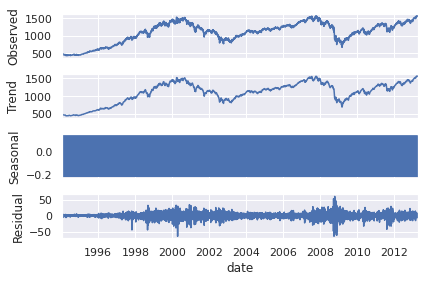

In [28]:
s_dec_additive = seasonal_decompose(df.market_value, model = "additive") # suma los tres efectos. 
s_dec_additive.plot()
plt.show()
# en el primero los valores reales. 
# la tendencia se parece mucho a la serie real. lo hace en función del día anterior. 
# La estacionalidad cambia de 0 a -0,2 no hay patrón. 
# los residuos nos dice que varian más en el 2,000 y 2009 mas menos.
# en resumen esto nos dice que no hay estacionalidad. 

In [30]:
import statsmodels.api as sm

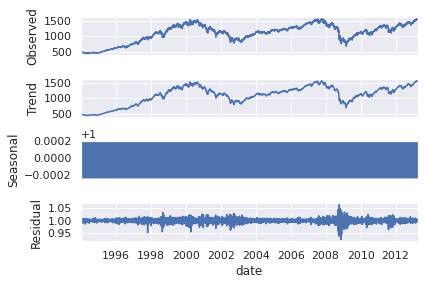

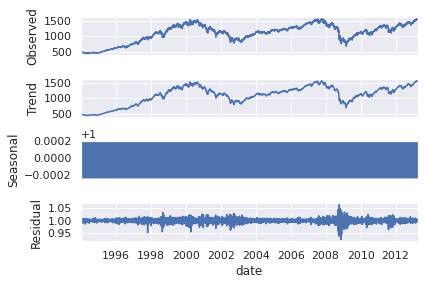

In [32]:
decomposition = sm.tsa.seasonal_decompose(df.market_value, model="multiplicative")
decomposition.plot()

In [35]:
decomposition.observed


date
1994-01-07     469.900000
1994-01-10     475.270000
1994-01-11     474.130000
1994-01-12     474.170000
1994-01-13     472.470000
                 ...     
2013-04-01    1562.173837
2013-04-02    1570.252238
2013-04-03    1553.686978
2013-04-04    1559.979316
2013-04-05    1553.278930
Freq: B, Name: market_value, Length: 5021, dtype: float64

In [36]:
decomposition.observed

date
1994-01-07     469.900000
1994-01-10     475.270000
1994-01-11     474.130000
1994-01-12     474.170000
1994-01-13     472.470000
                 ...     
2013-04-01    1562.173837
2013-04-02    1570.252238
2013-04-03    1553.686978
2013-04-04    1559.979316
2013-04-05    1553.278930
Freq: B, Name: market_value, Length: 5021, dtype: float64

In [37]:
decomposition.seasonal

date
1994-01-07    0.999875
1994-01-10    0.999774
1994-01-11    1.000183
1994-01-12    1.000132
1994-01-13    1.000036
                ...   
2013-04-01    0.999774
2013-04-02    1.000183
2013-04-03    1.000132
2013-04-04    1.000036
2013-04-05    0.999875
Freq: B, Name: market_value, Length: 5021, dtype: float64

In [38]:
print(decomposition.resid)

date
1994-01-07         NaN
1994-01-10         NaN
1994-01-11    1.001808
1994-01-12    0.999826
1994-01-13    0.997165
                ...   
2013-04-01    0.998485
2013-04-02    1.004421
2013-04-03    0.995902
2013-04-04         NaN
2013-04-05         NaN
Freq: B, Name: market_value, Length: 5021, dtype: float64


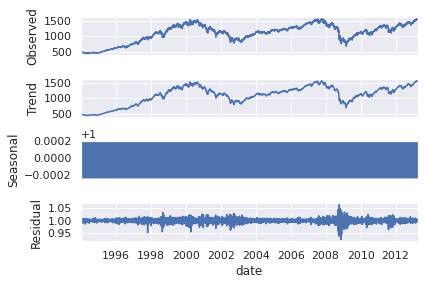

In [ ]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative") # se multiplican los tres. esta se utiliza más para las no lineales. 
s_dec_multiplicative.plot()
plt.show()
# los datos de la multiplicativa nos dice lo mismo. no hay estacionalidad. 

### ACF AUTOCORRELACIÓN

- las series temporales pueden tener una sola tendencia o las tres hacia arriba, estable y hacia abajo.
- diferenciamos la tendencia de la estacionalidad y del total
- también podemos encontrar ciertos comportamientos repetitivos cada ciertos años. se definen como comportamientos ciclicos.
- por lo tanto vamos a tener un comportamiento ciclico y otro de tendencia.  
- ciclico sin patrón

- filtro de hodrick-Prescott
    - separa una seire de tiempo en un componenete de tendencia y en un componenente ciclico
    - depende de un valor alfa que será. 
        - 1600 si es trimestral este es el que viene por defecto.
        - 6,25 si es anual
        - 129600 si es mensual 

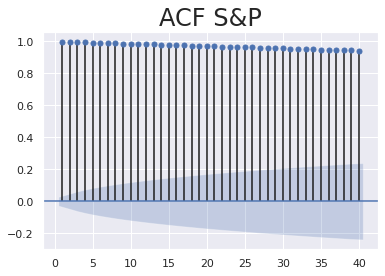

In [ ]:
sgt.plot_acf(df.market_value, lags = 40, zero = False) # LAGS son los retrasos, es decir nos estamos refiriendo a los 40 periodos anteriores, zero es el valor actual, que le decimos que no lo ponga
# porque la correlación entre este valor y si mismo es 1.
plt.title("ACF S&P", size = 24)
plt.show()
# lo que vemos son los valores de correlación. la primer linea nos dice un periodo, la segunda dos periodos. los periodos son días. 
# el area azul, significa la significación de los valores. se va expandiendo porque a mayor tiempo la correlación va decreciendo. es decir la probabilidad de ayer es mucho mayor que la de hace 40 dias.
# de todas las maneras decrece poco después de 40 dias. 


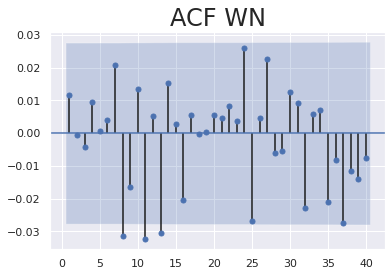

In [ ]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("ACF WN", size = 24)
plt.show()
# esto es ruido blanco.
# casi todas la lineas caen dentro de la linea azul. no hay autocorrelación. 


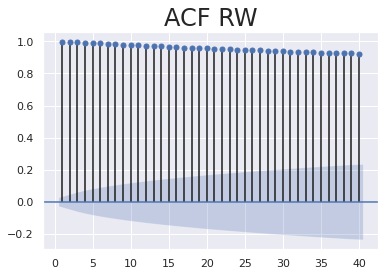

In [ ]:
sgt.plot_acf(df.rw, lags = 40, zero = False)
plt.title("ACF RW", size = 24)
plt.show()
# esto es para la caminata que es más parecido al primero. 

### PACF autocorrelación parcial

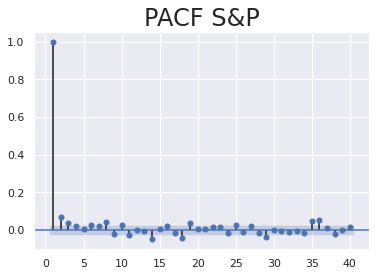

In [ ]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols')) # metodo ols 
plt.title("PACF S&P", size = 24)
plt.show()
# el area azul es la de significación, aqui vemos los que están fuera y que no tienen significancia el precio de hoy. 
# los que están fuera no son importantes. 

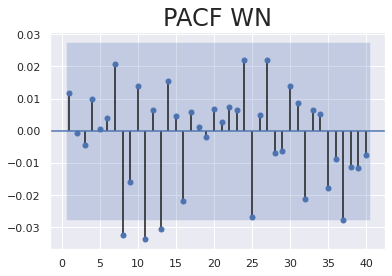

In [ ]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()
# en ruido blanco no hay correlación. hay alguno fuera pero no tiene importancia. 

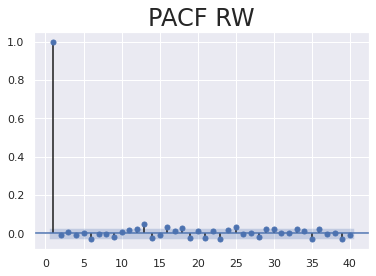

In [ ]:
sgt.plot_pacf(df.rw, lags = 40, zero = False, method = ('ols'))
plt.title("PACF RW", size = 24)
plt.show()
# esto es para la caminata aleatoria. 